In [3]:
# Establishing a connection to the database and forming an overall impression of the database design

import sqlite3

connection = sqlite3.connect("db/vivino.db")

cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [table[0] for table in cursor.fetchall()]
print("Tables:", tables)

for table in tables:
  print(f"\n**Table: {table}**")
  cursor.execute(f"PRAGMA table_info({table});")
  columns = [column[1] for column in cursor.fetchall()]
  print("Columns:", columns)

Tables: ['countries', 'grapes', 'wineries', 'flavor_groups', 'keywords', 'regions', 'most_used_grapes_per_country', 'toplists', 'wines', 'vintages', 'keywords_wine', 'vintage_toplists_rankings']

**Table: countries**
Columns: ['code', 'name', 'regions_count', 'users_count', 'wines_count', 'wineries_count']

**Table: grapes**
Columns: ['id', 'name']

**Table: wineries**
Columns: ['id', 'name']

**Table: flavor_groups**
Columns: ['name']

**Table: keywords**
Columns: ['id', 'name']

**Table: regions**
Columns: ['id', 'name', 'country_code']

**Table: most_used_grapes_per_country**
Columns: ['id', 'country_code', 'grape_id', 'wines_count']

**Table: toplists**
Columns: ['id', 'name', 'country_code']

**Table: wines**
Columns: ['id', 'name', 'is_natural', 'region_id', 'winery_id', 'ratings_average', 'ratings_count', 'url', 'acidity', 'fizziness', 'intensity', 'sweetness', 'tannin', 'user_structure_count']

**Table: vintages**
Columns: ['id', 'name', 'wine_id', 'ratings_average', 'ratings_c

In [30]:
for table in reversed(tables):
  print(f"\n**Table: {table}**")
  cursor.execute(f"PRAGMA table_info({table});")
  columns = [column[1] for column in cursor.fetchall()]
  print("Columns:", columns)


**Table: vintage_toplists_rankings**
Columns: ['id', 'top_list_id', 'vintage_id', 'rank', 'previous_rank']

**Table: keywords_wine**
Columns: ['keyword_id', 'wine_id', 'group_name', 'keyword_type', 'count']

**Table: vintages**
Columns: ['id', 'name', 'wine_id', 'ratings_average', 'ratings_count', 'year', 'price_euros', 'price_discounted_from', 'price_discount_percentage', 'bottle_volume_ml']

**Table: wines**
Columns: ['id', 'name', 'is_natural', 'region_id', 'winery_id', 'ratings_average', 'ratings_count', 'url', 'acidity', 'fizziness', 'intensity', 'sweetness', 'tannin', 'user_structure_count']

**Table: toplists**
Columns: ['id', 'name', 'country_code']

**Table: most_used_grapes_per_country**
Columns: ['id', 'country_code', 'grape_id', 'wines_count']

**Table: regions**
Columns: ['id', 'name', 'country_code']

**Table: keywords**
Columns: ['id', 'name']

**Table: flavor_groups**
Columns: ['name']

**Table: wineries**
Columns: ['id', 'name']

**Table: grapes**
Columns: ['id', 'nam

In [4]:
table_name = "countries"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [('it', 'Italie', 563, 4270717, 274658, 42399), ('fr', 'France', 1306, 5973301, 422503, 67553), ('us', 'États-Unis', 362, 12273684, 204060, 28145), ('es', 'Espagne', 152, 2264396, 102662, 18026), ('pt', 'Portugal', 93, 1123535, 39847, 5834), ('au', 'Australie', 120, 1022965, 90954, 13946), ('hu', 'Hongrie', 29, 102235, 16605, 1923), ('za', 'Afrique du Sud', 112, 269649, 30857, 4227), ('de', 'Allemagne', 236, 2549989, 164533, 13643), ('cl', 'Chili', 41, 326757, 41191, 5785), ('md', 'Moldavie', 9, 13583, 5055, 418), ('ar', 'Argentine', 41, 629532, 36121, 5339), ('gr', 'Grèce', 140, 95693, 9581, 1294), ('il', 'Israël', 20, 150549, 5435, 529), ('ro', 'Roumanie', 27, 228185, 6841, 686), ('hr', 'Croatie', 22, 64223, 5880, 980), ('ch', 'Suisse', 73, 1601799, 33656, 3849)]


In [5]:
table_name = "grapes"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(1, 'Shiraz/Syrah'), (2, 'Cabernet Sauvignon'), (5, 'Chardonnay'), (9, 'Malbec'), (10, 'Merlot'), (14, 'Pinot Noir'), (15, 'Riesling'), (16, 'Sangiovese'), (19, 'Tempranillo'), (51, 'Carménère'), (67, 'Touriga Nacional'), (68, 'Touriga Franca'), (69, 'Tinta Roriz'), (142, 'Garnacha'), (216, 'Agiorgitiko'), (224, 'Chasselas'), (299, 'Spätburgunder'), (326, 'Feteasca Neagra'), (355, 'Weissburgunder'), (394, 'Furmint'), (632, 'Plavac Mali')]


In [6]:
table_name = "wineries"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(1213, 'Vin Santo di Montepulciano'), (1268, 'St. Henri Shiraz'), (1471, 'Siepi'), (1647, 'Solare Toscana'), (1651, "Tenuta Tignanello 'Solaia'"), (1652, 'Tignanello'), (1658, 'Tenuta Guado al Tasso Bolgheri Superiore'), (1675, 'Pian delle Vigne Brunello di Montalcino'), (1688, 'Castello della Sala Cervaro della Sala'), (1690, 'Castello della Sala Muffato della Sala'), (1697, 'Chardonnay'), (1835, 'Amarone della Valpolicella Classico'), (1868, 'Nicolás Catena Zapata'), (1869, 'Malbec Argentino'), (2187, 'Alàuda'), (2218, 'Rioja 150 Aniversario'), (2997, "Puligny-Montrachet 1er Cru 'La Garenne'"), (3715, 'Monte Bello'), (3879, 'Cabernet Sauvignon (Signature)'), (3882, 'Merlot (Signature)'), (3908, 'Pauillac (Premier Grand Cru Classé)'), (4086, 'Almaviva'), (4793, 'Mille E Una Notte'), (4848, 'Overture'), (5078, 'Sassicaia'), (5194, 'Rutherford'), (5261, 'Chateau Buena Vista Cabernet Sauvignon Napa Valley'), (5278, 'Relentless'), (6020, 'Pavillon Rouge du Château Margaux'), (6153,

In [10]:
table_name = "flavor_groups"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [('earth',), ('oak',), ('red_fruit',), ('non_oak',), ('spices',), ('black_fruit',), ('microbio',), ('citrus_fruit',), ('floral',), ('dried_fruit',), ('vegetal',), ('tree_fruit',), ('tropical_fruit',)]


In [11]:
table_name = "keywords"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(1, '5-spice powder'), (2, 'acacia'), (3, 'acai berry'), (4, 'aleppo pepper'), (5, 'allspice'), (6, 'almond'), (7, 'anise'), (8, 'aniseed'), (9, 'apple'), (10, 'apple blossom'), (11, 'apricot'), (12, 'apricot jam'), (13, 'arugula'), (14, 'ash'), (15, 'asian pear'), (16, 'asparagus'), (17, "baby's breath"), (18, 'bacon fat'), (19, 'baked apple'), (20, 'baking chocolate'), (21, 'baking spice'), (22, 'balsamic'), (23, 'banana'), (24, 'barbecue meat'), (25, 'barbecue smoke'), (26, 'bay leaf'), (27, 'beef broth'), (28, 'beeswax'), (29, 'bell pepper'), (30, 'bergamot'), (31, 'berry jam'), (32, 'berry sauce'), (33, 'bilberry'), (34, 'bing cherry'), (35, 'biscuit'), (36, 'bitter almond'), (38, 'black cherry'), (39, 'black fruit'), (40, 'black licorice'), (41, 'black olive'), (43, 'black plum'), (44, 'black raisin'), (45, 'black raspberry'), (47, 'black truffle'), (48, 'black walnut'), (49, 'blackberry'), (50, 'blackberry jam'), (51, 'blackberry sauce'), (52, 'blackcurrant'), (53, 'black

In [12]:
table_name = "regions"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(7, 'South Australia', 'au'), (24, 'California', 'us'), (25, 'Napa Valley', 'us'), (26, 'Sonoma County', 'us'), (42, 'Oakville', 'us'), (51, 'Willamette Valley', 'us'), (55, 'Yamhill County', 'us'), (65, 'Lodi', 'us'), (85, 'Howell Mountain', 'us'), (86, 'Santa Cruz Mountains', 'us'), (88, 'Stags Leap District', 'us'), (91, 'Calistoga', 'us'), (94, 'Russian River Valley', 'us'), (96, 'Los Carneros', 'us'), (99, 'Sta. Rita Hills', 'us'), (100, 'Alexander Valley', 'us'), (105, 'Rutherford', 'us'), (324, 'Walla Walla Valley', 'us'), (327, 'Columbia Valley', 'us'), (383, 'Bordeaux', 'fr'), (384, 'Margaux', 'fr'), (385, 'Bourgogne', 'fr'), (387, 'Alsace', 'fr'), (389, 'Piemonte', 'it'), (393, 'Pauillac', 'fr'), (394, 'Toscana', 'it'), (397, 'Barossa Valley', 'au'), (399, 'Saint-Julien', 'fr'), (401, 'Châteauneuf-du-Pape', 'fr'), (405, 'Ribera del Duero', 'es'), (409, 'Champagne', 'fr'), (411, 'Cachapoal Valley', 'cl'), (425, 'Margaret River', 'au'), (429, 'Côtes-du-Rhône', 'fr'), (43

In [14]:
table_name = "toplists"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(20165, "Vivino's 2016 Wine Style Awards: Italian Barbaresco", 'global'), (20167, "Vivino's 2016 Wine Style Awards: Italian Barolo", 'global'), (20169, "Vivino's 2016 Wine Style Awards: Italian Bolgheri", 'global'), (20173, "Vivino's 2017 Wine Style Awards: Italian Amarone", 'global'), (20177, "Vivino's 2017 Wine Style Awards: Italian Barolo", 'global'), (20179, "Vivino's 2017 Wine Style Awards: Italian Bolgheri", 'global'), (20183, "Vivino's 2018 Wine Style Awards: Italian Amarone", 'global'), (20185, "Vivino's 2018 Wine Style Awards: Italian Barbaresco", 'global'), (20187, "Vivino's 2018 Wine Style Awards: Italian Barolo", 'global'), (20189, "Vivino's 2018 Wine Style Awards: Italian Bolgheri", 'global'), (20195, "Vivino's 2019 Wine Style Awards: Italian Barbaresco", 'global'), (20197, "Vivino's 2019 Wine Style Awards: Italian Barolo", 'global'), (20199, "Vivino's 2019 Wine Style Awards: Italian Bolgheri", 'global'), (20203, "Vivino's 2020 Wine Style Awards: Italian Amarone", '

In [15]:
table_name = "wines"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(1213, 'Vin Santo di Montepulciano', 0, 2693, 1574, 4.6, 773, 'https://www.seulementproduitsitaliens.be/spec_collezioni.php?CODICEWT=10AVVS92H', 4.492628, None, 3.9921334, 4.952543, None, 0), (1268, 'St. Henri Shiraz', 0, 7, 1305, 4.4, 17326, 'https://www.wijnig.nl/penfolds-st-henri-shiraz-2018.html', 3.0152445, None, 4.612774, 2.092192, 3.1030886, 1309), (1471, 'Siepi', 0, 394, 1620, 4.4, 8129, 'https://www.topwijnen.be/nl/product/wijnen/italie/toscane/igt-toscane/wn6010264/wn6010264', 3.156144, None, 3.4918664, 1.807986, 2.9856336, 755), (1647, 'Solare Toscana', 0, 394, 4772, 4.2, 4961, 'https://www.seulementproduitsitaliens.be/spec_collezioni.php?CODICE=2001658', 3.1583757, None, 3.3216164, 1.7018968, 3.0380645, 485), (1651, "Tenuta Tignanello 'Solaia'", 0, 394, 1252, 4.6, 33143, 'http://www.vivino.com/wines/159347388', 3.0641637, None, 3.4507132, 1.8885487, 2.9705827, 2131), (1652, 'Tignanello', 0, 394, 1252, 4.5, 142513, 'https://www.seulementproduitsitaliens.be/spec_collez

In [16]:
table_name = "vintages"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(2036, 'Mazzei Siepi 2005', 1471, 4.4, 580, 2005, 168.75, None, None, 750), (2202, 'Antinori Tignanello 2005', 1652, 4.5, 1933, 2005, 750.0, None, None, 1500), (10343, 'Casanova di Neri Tenuta Nuova Brunello di Montalcino 2001', 9712, 4.5, 611, 2001, 420.0, None, None, 750), (10786, 'Poggio Antico Altero Brunello di Montalcino 2006', 10152, 4.5, 236, 2006, 121.25, None, None, 750), (10809, 'Château Angelus Saint-Émilion Grand Cru (Premier Grand Cru Classé) 2007', 10175, 4.5, 876, 2007, 726.25, None, None, 750), (11563, 'Paul Jaboulet Aîné Hermitage La Chapelle Rouge 2006', 10922, 4.5, 927, 2006, 310.0, None, None, 750), (14600, 'Renato Ratti Barolo Rocche 2004', 13904, 4.5, 256, 2004, 202.5, None, None, 750), (14665, "Emidio Pepe Montepulciano d'Abruzzo 2001", 13969, 4.4, 452, 2001, 248.25, None, None, 750), (15887, 'La Spinetta Vürsù Barbaresco Starderi 2005', 15182, 4.4, 296, 2005, 262.5, None, None, 750), (21786, 'Renato Ratti Barolo Rocche 2001', 13904, 0.0, 2, 2001, 276.25,

In [32]:
table_name = "keywords_wine"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(242, 82698, 'earth', 'primary', 73), (284, 82698, 'earth', 'primary', 46), (156, 82698, 'earth', 'primary', 28), (22, 82698, 'earth', 'primary', 23), (384, 82698, 'earth', 'primary', 21), (430, 82698, 'earth', 'primary', 16), (165, 82698, 'earth', 'primary', 12), (412, 82698, 'earth', 'primary', 10), (276, 82698, 'earth', 'primary', 9), (178, 82698, 'earth', 'primary', 7), (192, 82698, 'earth', 'primary', 5), (113, 82698, 'earth', 'primary', 3), (14, 82698, 'earth', 'primary', 3), (160, 82698, 'earth', 'primary', 2), (376, 82698, 'earth', 'primary', 2), (398, 82698, 'earth', 'primary', 2), (218, 82698, 'earth', 'primary', 2), (431, 82698, 'earth', 'primary', 2), (226, 82698, 'earth', 'primary', 1), (85, 82698, 'earth', 'primary', 1), (47, 82698, 'earth', 'primary', 1), (111, 82698, 'earth', 'primary', 1), (377, 82698, 'earth', 'primary', 1), (443, 82698, 'earth', 'primary', 1), (465, 82698, 'earth', 'primary', 1), (422, 82698, 'earth', 'secondary', 57), (381, 82698, 'earth', 's

In [31]:
table_name = "most_used_grapes_per_country"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(1, 'it', 16, 125094), (2, 'it', 5, 604208), (3, 'it', 10, 566719), (4, 'fr', 14, 572334), (5, 'fr', 5, 604208), (6, 'fr', 10, 566719), (7, 'us', 2, 801751), (8, 'us', 14, 572334), (9, 'us', 5, 604208), (10, 'es', 19, 172842), (11, 'es', 142, 58111), (12, 'es', 2, 801751), (13, 'pt', 67, 85787), (14, 'pt', 69, 41047), (15, 'pt', 68, 33763), (16, 'au', 1, 551112), (17, 'au', 2, 801751), (18, 'au', 5, 604208), (19, 'hu', 394, 11130), (20, 'hu', 2, 801751), (21, 'hu', 10, 566719), (22, 'za', 2, 801751), (23, 'za', 1, 551112), (24, 'za', 10, 566719), (25, 'de', 15, 262136), (26, 'de', 299, 50164), (27, 'de', 355, 33464), (28, 'cl', 2, 801751), (29, 'cl', 51, 50087), (30, 'cl', 10, 566719), (31, 'md', 2, 801751), (32, 'md', 10, 566719), (33, 'md', 5, 604208), (34, 'ar', 9, 219735), (35, 'ar', 2, 801751), (36, 'ar', 5, 604208), (37, 'gr', 216, 3476), (38, 'gr', 10, 566719), (39, 'gr', 2, 801751), (40, 'il', 2, 801751), (41, 'il', 10, 566719), (42, 'il', 1, 551112), (43, 'ro', 10, 5667

In [20]:
table_name = "vintage_toplists_rankings"
cursor.execute(f"SELECT * FROM {table_name};")
data = cursor.fetchall()
print("Data:", data)

Data: [(1, 201650, 1161459, 7, 7), (2, 201850, 1161459, 3, 3), (3, 201950, 1161459, 3, 3), (4, 202050, 1161459, 1, 1), (5, 2019264, 93707, 2, 2), (6, 2020264, 93707, 2, 2), (7, 2018264, 2641965, 2, 2), (8, 2020292, 6880159, 1, 1), (9, 201647, 6988511, 1, 1), (10, 2019292, 6988511, 2, 2), (11, 201650, 1688597, 6, 6), (12, 2019289, 14187320, 1, 1), (13, 2018264, 1347152, 5, 5), (14, 2019264, 1347152, 6, 6), (15, 201647, 1316676, 5, 5), (16, 2019292, 1316676, 3, 3), (17, 2020292, 1316676, 2, 2), (18, 20169, 1418050, 2, 2), (19, 20199, 1411331, 1, 1), (20, 20209, 1411331, 2, 2), (21, 20173, 1292680, 2, 2), (22, 201850, 1411312, 7, 7), (23, 202050, 1411312, 3, 3), (24, 2016262, 2765008, 4, 4), (25, 201647, 752644, 2, 2), (26, 201747, 752644, 3, 3), (27, 201747, 6457741, 1, 1), (28, 20203, 1152340, 2, 2), (29, 201750, 1527879, 3, 3), (30, 2017264, 3887212, 3, 3), (31, 2019301, 105812, 3, 3), (32, 2020301, 105812, 1, 1), (33, 2018292, 7372117, 1, 1), (34, 2016212, 1602232, 1, 1), (35, 2017212

In [3]:
# Testing one of the hypotheses regarding 10 wines that will increase client sales

cursor.execute("""
SELECT name, ratings_average, ratings_count, price_euros 
FROM vintages 
ORDER BY ratings_average DESC, ratings_count DESC, price_euros ASC 
LIMIT 10;
""")

rows = cursor.fetchall()

for row in rows:
    print(row)

('Biondi-Santi Brunello di Montalcino Riserva 1955', 4.9, 35, 1970.05)
("Château Doisy-Daëne L'Extravagant de Doisy-Daëne Sauternes 2001", 4.9, 32, 397.5)
('Pétrus Pomerol 1990', 4.8, 1190, 6300.0)
('Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut Champagne 1996', 4.8, 1004, 2882.5)
('Château Lafite Rothschild Pauillac (Premier Grand Cru Classé) 2003', 4.8, 1000, 1900.0)
('Château Latour Grand Vin Pauillac (Premier Grand Cru Classé) 2003', 4.8, 920, 1686.25)
('Masseto Toscana 2006', 4.8, 797, 4910.0)
("Château d'Yquem Sauternes 2015", 4.8, 763, 811.25)
('Masseto Toscana 2005', 4.8, 762, 4697.5)
('Masseto Toscana 2001', 4.8, 651, 5231.25)


In [5]:
# Average price of wine in the database

cursor.execute("""SELECT AVG(price_euros) FROM vintages;""")
average_price = cursor.fetchone()[0]

print(average_price)

619.7740113821102


In [5]:
# Average number of votes for specific wine in the database

cursor.execute("""SELECT AVG(ratings_count) FROM vintages;""")
average_num_votes = cursor.fetchone()[0]

print(average_num_votes)

526.3165853658537


In [6]:
# Average rating of wines in the database

cursor.execute("""SELECT AVG(ratings_average) FROM vintages;""")
average_rating = cursor.fetchone()[0]

print(average_rating)

3.4047804878048535


In [6]:
# Testing second hypothese regarding 10 wines that will increase client sales

cursor.execute(f"""SELECT name, ratings_average, ratings_count, price_euros 
                FROM vintages 
                WHERE price_euros < {average_price} 
                ORDER BY ratings_average DESC, ratings_count DESC
                LIMIT 10; """)

rows = cursor.fetchall()
for row in rows:
    print(row)

("Château Doisy-Daëne L'Extravagant de Doisy-Daëne Sauternes 2001", 4.9, 32, 397.5)
('Quintarelli Giuseppe Amarone della Valpolicella Classico 2013', 4.8, 444, 425.0)
('Quintarelli Giuseppe Veneto Alzero Cabernet 2009', 4.8, 208, 555.0)
('Casanova di Neri Cerretalto Brunello di Montalcino 2016', 4.8, 175, 379.0)
('Artadi Viña El Pison 2018', 4.8, 64, 437.5)
('Dal Forno Romano Nettare Veneto Bianco 1995', 4.8, 38, 310.0)
('Vega Sicilia Valbuena 5º 2016', 4.7, 3465, 202.2)
('Château Pontet-Canet Pauillac (Grand Cru Classé) 2009', 4.7, 3275, 597.5)
('Opus One Opus One 2017', 4.7, 2722, 535.0)
('Opus One Opus One 2018', 4.7, 2228, 527.6)


In [17]:
"""
This feature selects the top 10 wines to promote based on the following criteria:
    
1. Number of Ratings: This approach assumes that a wine that has been rated by more 
people is more popular and therefore more likely to sell.
    
2. Price: The €100 price limit helps ensure that the selected wines are affordable to 
the majority of buyers. This is important for increasing sales, since more expensive 
wines may only be available to a limited number of buyers.
    
This approach to selecting wines to promote helps balance popularity (based on number 
of ratings) and availability (based on price), with the goal of attracting as many 
buyers as possible and increasing sales.
"""


cursor.execute("""
SELECT name, ratings_average, ratings_count, price_euros 
FROM vintages 
WHERE price_euros <= 100 
ORDER BY ratings_count DESC
LIMIT 10;
""")

rows = cursor.fetchall()
for row in rows:
    print(row)

('Laurent-Perrier Brut Cuvée Champagne Rosé', 4.4, 36681, 72.0)
('Billecart-Salmon Brut Rosé Champagne', 4.4, 23241, 81.5)
('Ruinart Brut Rosé Champagne', 4.4, 21147, 49.61)
('San Marzano 60 Sessantanni Old Vines Primitivo di Manduria 2017', 4.5, 17090, 63.95)
('Tenuta Ulisse Limited Edition 10 Vendemmie', 4.5, 9453, 34.2)
('Matarromera Ribera del Duero Reserva 2018', 4.4, 5650, 39.95)
('Billecart-Salmon Blanc de Blancs Brut Champagne Grand Cru', 4.4, 5553, 92.95)
('Matarromera Ribera del Duero Reserva 2017', 4.4, 4616, 49.95)
('Antinori Pian delle Vigne Brunello di Montalcino 2013', 4.4, 4163, 96.3)
('Orin Swift Papillon 2018', 4.5, 3907, 79.95)


In [4]:
# We select the top 3 countries with the largest number of wines with a rating of at least 4 and a price of up to 100 euros
cursor.execute("""
SELECT c.name, COUNT(*) AS num_wines
FROM vintages v
JOIN wines w ON v.wine_id = w.id
JOIN regions r ON w.region_id = r.id
JOIN countries c ON r.country_code = c.code
WHERE v.ratings_average >= 4.4 AND v.price_euros <= 100
GROUP BY c.name
ORDER BY num_wines DESC
LIMIT 4;
""")

rows = cursor.fetchall()
for row in rows:
    print(f"Country: {row[0]}, Number of wines: {row[1]}")

Country: Italie, Number of wines: 102
Country: Espagne, Number of wines: 44
Country: France, Number of wines: 29
Country: Afrique du Sud, Number of wines: 22


In [30]:
# We select the country with the largest number of wines with a rating of at least 4.4 and a price of up to 100 euros
cursor.execute("""
SELECT c.name, COUNT(*) AS num_wines
FROM vintages v
JOIN wines w ON v.wine_id = w.id
JOIN regions r ON w.region_id = r.id
JOIN countries c ON r.country_code = c.code
WHERE v.ratings_average >= 4.4 AND v.price_euros <= 100
GROUP BY c.name
ORDER BY num_wines DESC
LIMIT 1;
""")

country = cursor.fetchone()[0]
print(f"The country to prioritise is: {country}")

The country to prioritise is: Italie


In [35]:
# There is no required amount of info to select 3 best wineries.
cursor.execute("""
SELECT w.name, AVG(v.ratings_average) as average_rating, SUM(v.ratings_count) as total_reviews, AVG(v.price_euros) as average_price 
FROM vintages v
JOIN wines wi ON v.wine_id = wi.id
JOIN wineries w ON wi.winery_id = w.id
GROUP BY w.name
HAVING average_rating >= 4 AND average_price <= 100
ORDER BY average_rating DESC, total_reviews DESC, average_price ASC
LIMIT 3;
""")

rows = cursor.fetchall()

for row in rows:
    print(row)

('Tignanello', 4.5, 121, 39.9)
('Siepi', 4.4, 991, 64.99)


In [5]:
# Flavorful Mixed-Fruit Wines
cursor.execute("""
SELECT v.name, v.wine_id
FROM keywords_wine kw
JOIN keywords k ON kw.keyword_id = k.id
JOIN vintages v ON k.id = kw.wine_id
WHERE (k.name LIKE ? 
       OR k.name LIKE ? 
       OR k.name LIKE ? 
       OR k.name LIKE ? 
       OR k.name LIKE ?)
       AND kw.count >= 10
GROUP BY v.wine_id;
""",
('%coffee%', '%toast%', '%green apple%', '%cream%', '%citrus%')
)

rows = cursor.fetchall()

print(rows)

[]


In [11]:
# Finding the top 3 grape varieties that are used in the largest number of wines.
cursor.execute("""
SELECT g.name, COUNT(*) AS num_wines
FROM grapes g 
JOIN most_used_grapes_per_country m ON g.id = m.grape_id
GROUP BY g.name
ORDER BY num_wines DESC
LIMIT 3;
""")

top_grapes = cursor.fetchall()
for grape in top_grapes:
    print(grape)

('Cabernet Sauvignon', 12)
('Merlot', 11)
('Chardonnay', 6)


In [38]:
# For each of the most popular types of grapes, we find wines with the highest rating.
for grape in top_grapes:
    cursor.execute("""
    SELECT v.name, v.ratings_average
    FROM vintages v
    JOIN wines w ON v.wine_id = w.id
    JOIN regions r ON w.region_id = r.id
    JOIN countries c ON r.country_code = c.code
    JOIN most_used_grapes_per_country m ON m.country_code = c.code
    JOIN grapes g ON m.grape_id = g.id
    WHERE g.name = ?
    ORDER BY v.ratings_average DESC
    LIMIT 5;
    """, (grape[0],))

    print(f"Wines from grape {grape[0]}:")
    rows = cursor.fetchall()
    for row in rows:
        print(row)

Wines from grape Cabernet Sauvignon:
('Harlan Estate Harlan Estate Red 1998', 4.8)
('Scarecrow Cabernet Sauvignon 2015', 4.8)
('Colgin IX Estate Red 2016', 4.8)
('Artadi Viña El Pison 2018', 4.8)
('Leonetti Cabernet Sauvignon 2006', 4.7)
Wines from grape Merlot:
("Château Doisy-Daëne L'Extravagant de Doisy-Daëne Sauternes 2001", 4.9)
('Biondi-Santi Brunello di Montalcino Riserva 1955', 4.9)
('Château Lafite Rothschild Pauillac (Premier Grand Cru Classé) 2003', 4.8)
('Krug Clos du Mesnil 1998', 4.8)
('Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut Champagne 1996', 4.8)
Wines from grape Chardonnay:
("Château Doisy-Daëne L'Extravagant de Doisy-Daëne Sauternes 2001", 4.9)
('Biondi-Santi Brunello di Montalcino Riserva 1955', 4.9)
('Château Lafite Rothschild Pauillac (Premier Grand Cru Classé) 2003', 4.8)
('Krug Clos du Mesnil 1998', 4.8)
('Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut Champagne 1996', 4.8)


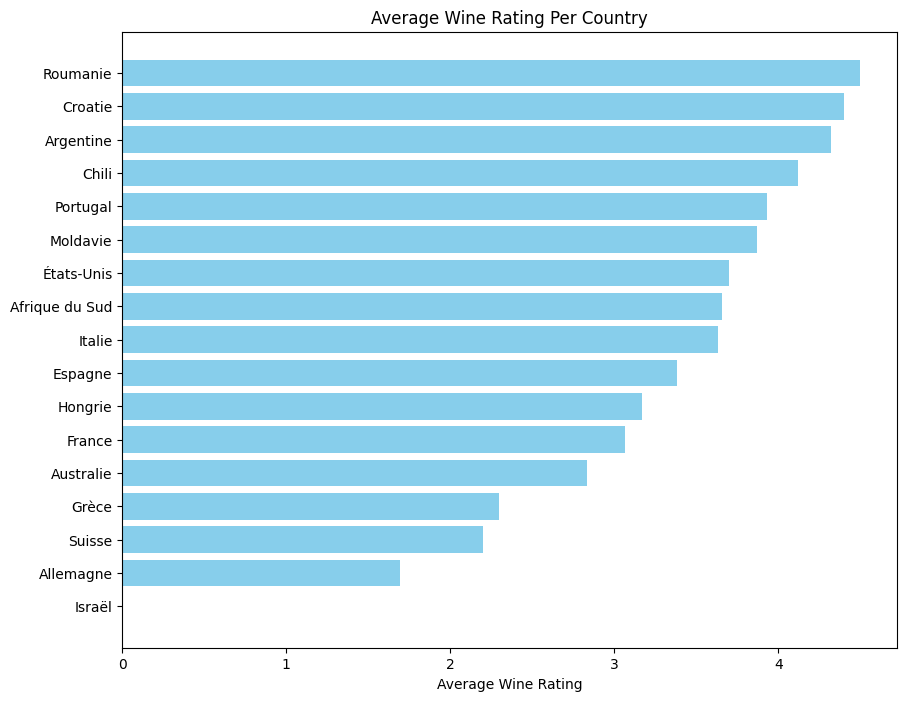

In [41]:
# Getting the average rating for each country's wines
import matplotlib.pyplot as plt

query = """
SELECT c.name AS country, AVG(v.ratings_average) AS average_rating
FROM vintages v
JOIN wines w ON v.wine_id = w.id
JOIN regions r ON w.region_id = r.id
JOIN countries c ON r.country_code = c.code
GROUP BY c.name
ORDER BY average_rating DESC;
"""
cursor.execute(query)
result = cursor.fetchall()

countries = [row[0] for row in result]
average_ratings = [row[1] for row in result]

plt.figure(figsize=(10,8))
plt.barh(countries, average_ratings, color='skyblue')
plt.xlabel('Average Wine Rating')
plt.title('Average Wine Rating Per Country')
plt.gca().invert_yaxis()  
plt.show()

In [42]:

"""
This feature executes an SQL query to the database to retrieve the top 5 Cabernet Sauvignon wines 
based on their average ratings.

The query joins several tables together (vintages, wines, regions, countries, most_used_grapes_per_country, 
and grapes) and filters the results to only have wines made from grape 'Cabernet Sauvignon', using a WHERE 
condition. It then orders the result by the ratings (in decreasing order) and by price (in increasing order) 
to favor cheaper wines for the same rating, and limits the result to 5 rows.
"""

cursor.execute("""
SELECT v.name, v.ratings_average, v.price_euros
FROM vintages v
JOIN wines w ON v.wine_id = w.id
JOIN regions r ON w.region_id = r.id
JOIN countries c ON r.country_code = c.code
JOIN most_used_grapes_per_country m ON m.country_code = c.code
JOIN grapes g ON m.grape_id = g.id
WHERE g.name = 'Cabernet Sauvignon'
ORDER BY v.ratings_average DESC, v.price_euros ASC
LIMIT 5;
""")

rows = cursor.fetchall()
for row in rows:
    print(row)

('Artadi Viña El Pison 2018', 4.8, 437.5)
('Colgin IX Estate Red 2016', 4.8, 745.0)
('Scarecrow Cabernet Sauvignon 2015', 4.8, 1558.75)
('Harlan Estate Harlan Estate Red 1998', 4.8, 1921.25)
('Titus Lot 1 2014', 4.7, 95.0)


In [25]:
connection.close()